In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Dejo Osejoro - E-commerce_Dataset.csv")

In [ ]:
print("Shape Of The DataFrame")
df.shape

Shape Of The DataFrame


(500, 12)

In [ ]:
df.head()

,CustomerID,Age,Gender,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage,LoyaltyProgramMember
0,1,38,Female,749.097626,24,2,1,3,5,0.12,135.392573,No
1,2,30,Male,735.224916,18,5,4,4,5,0.37,193.450663,Yes
2,3,55,Male,1145.520305,22,3,5,4,1,0.10,147.246263,Yes
3,4,39,Female,925.460535,14,4,3,2,4,0.38,56.362894,Yes
4,5,51,Male,108.359916,9,3,3,2,5,0.42,338.731055,No


In [ ]:
# A little research on understanding the data structure and type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              500 non-null    int64  
 1   Age                     500 non-null    int64  
 2   Gender                  500 non-null    object 
 3   PurchaseAmount          500 non-null    float64
 4   PurchaseFrequency       500 non-null    int64  
 5   ProductQualityRating    500 non-null    int64  
 6   DeliveryTimeRating      500 non-null    int64  
 7   CustomerServiceRating   500 non-null    int64  
 8   WebsiteEaseOfUseRating  500 non-null    int64  
 9   ReturnRate              500 non-null    float64
 10  DiscountUsage           500 non-null    float64
 11  LoyaltyProgramMember    500 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 47.0+ KB


In [ ]:
#Checking for possible duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checking for null values - P.S : I already know there are no null values from the .info() output but anyways.
df.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
PurchaseAmount            0
PurchaseFrequency         0
ProductQualityRating      0
DeliveryTimeRating        0
CustomerServiceRating     0
WebsiteEaseOfUseRating    0
ReturnRate                0
DiscountUsage             0
LoyaltyProgramMember      0
dtype: int64

In [ ]:
#Statistical Summary of Numerical columns
df.describe()

,CustomerID,Age,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,250.500000,44.170000,1065.050731,14.308000,2.93400,3.008000,3.0780,3.082000,0.252280,251.181010
std,144.481833,14.813777,583.199658,8.151197,1.41054,1.372481,1.4156,1.415374,0.149674,141.531993
min,1.000000,18.000000,51.799790,1.000000,1.00000,1.000000,1.0000,1.000000,0.000000,0.772696
25%,125.750000,32.000000,535.083407,7.000000,2.00000,2.000000,2.0000,2.000000,0.110000,133.672231
50%,250.500000,44.000000,1100.884065,14.000000,3.00000,3.000000,3.0000,3.000000,0.260000,251.940355
75%,375.250000,58.000000,1584.348124,22.000000,4.00000,4.000000,4.0000,4.000000,0.380000,371.692341
max,500.000000,69.000000,1999.655968,29.000000,5.00000,5.000000,5.0000,5.000000,0.500000,499.813315


In [ ]:
"""Haven seen the statiscal report on the age column, i suggest segmenting it into age groups since there is a wise spread of ages.
Hence i am checking the number of unique ages in the age column"""

len(df["Age"].unique())

52

#### **Age Column Group Encoding**

------
For the `age` column we might as well have age-groups instead of values(It speaks more loudly and helps me understand the data)
Recall from the .describe() we can see the `min_age = 18`and `max_age = 69`. Also the `std= 14.48` showing there's a spraed between these 2 extremes(It's obvious from the array above too).
Hence, I'll form the age groups based on the percentiles `Young Adults(18-34)`, `Adults(35-54)` and `Older Adults(55-69)`

In [ ]:
# Defining a function that would assign name tags to the different age ranges.
def age_grouper(age):
    if age < 35:
        return "Young Adults"
    elif 34 < age < 55 :
        return "Adults"
    elif 54 < age < 70 :
        return "Older Adults"

df["AgeGroup"] = df["Age"].apply(age_grouper)

In [ ]:
df["AgeGroup"].unique()

array(['Adults', 'Young Adults', 'Older Adults'], dtype=object)

In [ ]:
# I'm rechecking for missing values.
df.isna().sum()

CustomerID                0
Age                       0
Gender                    0
PurchaseAmount            0
PurchaseFrequency         0
ProductQualityRating      0
DeliveryTimeRating        0
CustomerServiceRating     0
WebsiteEaseOfUseRating    0
ReturnRate                0
DiscountUsage             0
LoyaltyProgramMember      0
AgeGroup                  0
dtype: int64

## **Exploratory Analysis**
From the previous cell, we can note that there are no null values Neither are there Duplicates. So our dataset is set for EDA

### **Univariate Exploratory Analysis**

In [ ]:
df.describe()

,CustomerID,Age,PurchaseAmount,PurchaseFrequency,ProductQualityRating,DeliveryTimeRating,CustomerServiceRating,WebsiteEaseOfUseRating,ReturnRate,DiscountUsage
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.0000,500.000000,500.000000,500.000000
mean,250.500000,44.170000,1065.050731,14.308000,2.93400,3.008000,3.0780,3.082000,0.252280,251.181010
std,144.481833,14.813777,583.199658,8.151197,1.41054,1.372481,1.4156,1.415374,0.149674,141.531993
min,1.000000,18.000000,51.799790,1.000000,1.00000,1.000000,1.0000,1.000000,0.000000,0.772696
25%,125.750000,32.000000,535.083407,7.000000,2.00000,2.000000,2.0000,2.000000,0.110000,133.672231
50%,250.500000,44.000000,1100.884065,14.000000,3.00000,3.000000,3.0000,3.000000,0.260000,251.940355
75%,375.250000,58.000000,1584.348124,22.000000,4.00000,4.000000,4.0000,4.000000,0.380000,371.692341
max,500.000000,69.000000,1999.655968,29.000000,5.00000,5.000000,5.0000,5.000000,0.500000,499.813315


In [ ]:
# Statistical Summary of non-numeerical columns.
df[["Gender","LoyaltyProgramMember","AgeGroup"]].describe().T

,count,unique,top,freq
Gender,500,2,Female,266
LoyaltyProgramMember,500,2,Yes,261
AgeGroup,500,3,Adults,201


In [ ]:
#Total Purchases Made
sum_total_purchases = df["PurchaseAmount"].sum()
print(f"The Sum Total Of Purchases Made is : {sum_total_purchases :.2f}")

The Sum Total Of Purchases Made is : 532525.37


In [ ]:
#Age
age_group_distribution = df["AgeGroup"].value_counts()
age_group_distribution

AgeGroup
Adults          201
Older Adults    153
Young Adults    146
Name: count, dtype: int64

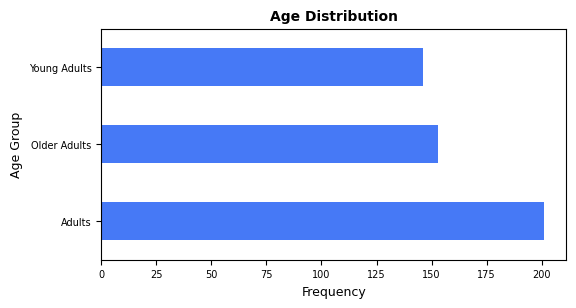

In [ ]:
plt.figure(figsize = (6,3))
age_group_distribution.plot(kind="barh", color = "#4679f6")
plt.title("Age Distribution", fontsize = 10,fontweight = 600)
plt.ylabel("Age Group",fontsize = 9)
plt.xlabel("Frequency", fontsize = 9)
plt.xticks(rotation = 0, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

In [ ]:
#Gender
gender_distribution = df["Gender"].value_counts()
gender_distribution

Gender
Female    266
Male      234
Name: count, dtype: int64

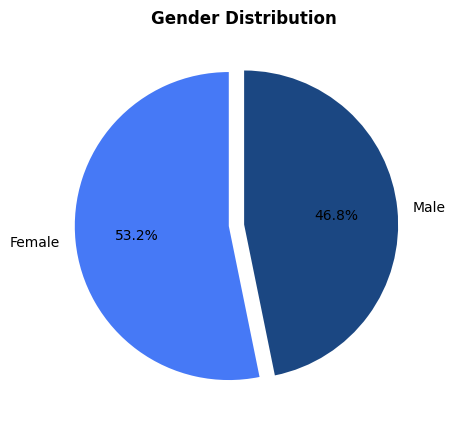

In [ ]:
plt.figure(figsize = (5,5))
gender_distribution.plot(kind="pie",autopct ='%1.1f%%',startangle=90, colors=['#4679f6','#1b4782'], explode=(0.1, 0), labels = gender_distribution.index)
plt.title("Gender Distribution", fontweight = 600)
plt.ylabel("")
plt.show()

In [ ]:
#Loyalty Program Members
loyal_members_distribution = df["LoyaltyProgramMember"].value_counts()
loyal_members_distribution

LoyaltyProgramMember
Yes    261
No     239
Name: count, dtype: int64

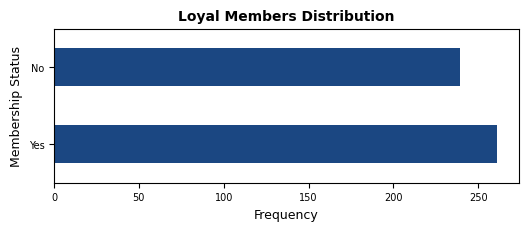

In [ ]:
plt.figure(figsize = (6,2))
loyal_members_distribution.plot(kind="barh", color = "#1b4782")
plt.title("Loyal Members Distribution",fontsize = 10, fontweight = 600)
plt.ylabel("Membership Status",fontsize = 9)
plt.xlabel("Frequency", fontsize = 9)
plt.xticks(rotation = 0, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

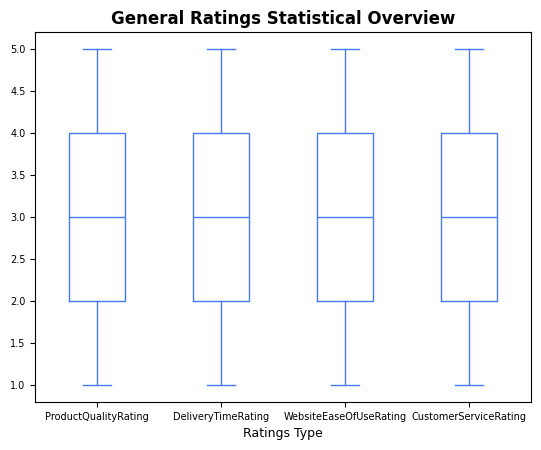

In [ ]:
"""I chose a box plot, because from my examination of the data, the ratings columns were very similar in their influence on the data and a boxplot
is a pictoral representation of a statistical summary"""
df[["ProductQualityRating","DeliveryTimeRating","WebsiteEaseOfUseRating","CustomerServiceRating"]].plot(kind ="box", color ='#4679f6')
plt.xticks(rotation = 0, fontsize = 7)
plt.yticks(fontsize = 7)
plt.title("General Ratings Statistical Overview", fontweight = 600)
plt.xlabel("Ratings Type",fontsize = 9)
plt.show()

In [ ]:
#Checking the columns list to see what columns would be needed to answer these questions...
df.columns

Index(['CustomerID', 'Age', 'Gender', 'PurchaseAmount', 'PurchaseFrequency',
       'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating',
       'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage',
       'LoyaltyProgramMember', 'AgeGroup'],
      dtype='object')

### **Bivariate/Multivariate Exploratory Analysis**
This part of my analysis focuses on finding the association or correlation between 2 or more of any columns.
At this point i'll not be needing the `CustomerID` column since it contains no insight.

1. I could use the groupby manipulations(Grouping by the categorical columns) to find some insights.
2. If it is insufficient I'd encode the Categorical columns so that they become numerical, then i could use a correlation method and visualize it using a heatmap.
3. **Update** : The Groupbys were not entirely sufficient hence I used a correlation map after encoding the categorical columns.
-------------
**Assumptions or Questions i look forward to answering**

**For Customers Satisfaction**
Features - `CustomerServiceRating`,`WebsiteEaseOfUseRating`, `ReturnRate`,`ProductQualityRating`, `DiscountUsage`(This i want to see if the discounts help in improving customer's satistaction.), `LoyaltyProgramMember` - Did their satisfaction influence thier joining this program ?

1. Monitor the customers with the highest frequent purchases. Target Columns needed - `Purchase Frequency`.
2. Monitor the customers with the highest purchases. Target Columns needed - `PurchaseAmount`
**For Customers Disatisfaction**

1.Look out for very bad ratings the lowest ratings. Most especially the `ReturnRate Column`

--------
**Age and Gender**
We need to see if `Age` and `Gender` had an influence on the overall satisfaction or disatisfaction of customers as the case may be.

**From all this i can get an insight to what actions the company should take**

In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'PurchaseAmount', 'PurchaseFrequency',
       'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating',
       'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage',
       'LoyaltyProgramMember', 'AgeGroup'],
      dtype='object')

In [ ]:
df.drop(columns="CustomerID", inplace = True)

#### Gender groupby's
**Like i said earlier i wanted to see if there was a gender bias on satisfaction. So far so good there exists no much of a very significant bias.**

In [ ]:
df.groupby("Gender")[['PurchaseAmount','PurchaseFrequency','DiscountUsage']].describe().T

Gender                        Female         Male
PurchaseAmount    count   266.000000   234.000000
                  mean   1037.588156  1096.268871
                  std     596.545745   567.304540
                  min      51.799790    85.004597
                  25%     503.322455   584.191117
                  50%    1026.623557  1137.555586
                  75%    1603.673193  1573.927577
                  max    1992.101937  1999.655968
PurchaseFrequency count   266.000000   234.000000
                  mean     14.842105    13.700855
                  std       8.223613     8.042553
                  min       1.000000     1.000000
                  25%       8.000000     7.000000
                  50%      14.000000    13.000000
                  75%      22.000000    20.750000
                  max      29.000000    29.000000
DiscountUsage     count   266.000000   234.000000
                  mean    256.152330   245.529851
                  std     143.165986   139.742282
                  min       0.944364     0.772696
                  25%     126.848181   139.937730
                  50%     254.774827   249.376912
                  75%     379.070374   360.940255
                  max     496.367529   499.813315

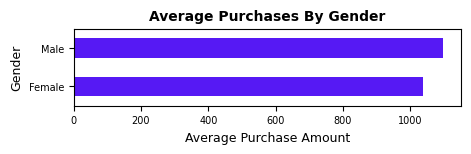

Gender
Female    1037.588156
Male      1096.268871
Name: PurchaseAmount, dtype: float64


In [ ]:
purchase_by_gender = df.groupby("Gender")["PurchaseAmount"].mean()

#Plotting the distribution
plt.figure(figsize = (5,1))
purchase_by_gender.plot(kind="barh", color = "#5619f4",)
plt.title("Average Purchases By Gender",fontsize = 10, fontweight = 600)
plt.ylabel("Gender",fontsize = 9)
plt.xlabel("Average Purchase Amount", fontsize = 9)
plt.xticks(rotation = 0, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()
print(f"{purchase_by_gender}")

In [ ]:
df.groupby("Gender")[['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating',
       'WebsiteEaseOfUseRating', 'ReturnRate']].describe().T

Gender                            Female        Male
ProductQualityRating   count  266.000000  234.000000
                       mean     2.984962    2.876068
                       std      1.400727    1.422393
                       min      1.000000    1.000000
                       25%      2.000000    2.000000
                       50%      3.000000    3.000000
                       75%      4.000000    4.000000
                       max      5.000000    5.000000
DeliveryTimeRating     count  266.000000  234.000000
                       mean     3.052632    2.957265
                       std      1.380816    1.364121
                       min      1.000000    1.000000
                       25%      2.000000    2.000000
                       50%      3.000000    3.000000
                       75%      4.000000    4.000000
                       max      5.000000    5.000000
CustomerServiceRating  count  266.000000  234.000000
                       mean     3.045113    3.115385
                       std      1.394678    1.441096
                       min      1.000000    1.000000
                       25%      2.000000    2.000000
                       50%      3.000000    3.000000
                       75%      4.000000    4.000000
                       max      5.000000    5.000000
WebsiteEaseOfUseRating count  266.000000  234.000000
                       mean     3.030075    3.141026
                       std      1.397787    1.435817
                       min      1.000000    1.000000
                       25%      2.000000    2.000000
                       50%      3.000000    3.000000
                       75%      4.000000    4.000000
                       max      5.000000    5.000000
ReturnRate             count  266.000000  234.000000
                       mean     0.253872    0.250470
                       std      0.146549    0.153445
                       min      0.000000    0.000000
                       25%      0.120000    0.102500
                       50%      0.250000    0.270000
                       75%      0.380000    0.390000
                       max      0.500000    0.500000

In [ ]:
df.columns

Index(['Age', 'Gender', 'PurchaseAmount', 'PurchaseFrequency',
       'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating',
       'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage',
       'LoyaltyProgramMember', 'AgeGroup'],
      dtype='object')

In [ ]:
df.groupby("Gender")[['LoyaltyProgramMember','AgeGroup']].describe().T

Gender                       Female    Male
LoyaltyProgramMember count      266     234
                     unique       2       2
                     top        Yes     Yes
                     freq       139     122
AgeGroup             count      266     234
                     unique       3       3
                     top     Adults  Adults
                     freq       103      98

In [ ]:
# Grouping according to their Membership and Gender
df2 = df.groupby(["Gender",'LoyaltyProgramMember']).size().unstack()
df2

LoyaltyProgramMember,No,Yes
Gender,,
Female,127,139
Male,112,122


<Figure size 500x100 with 0 Axes>

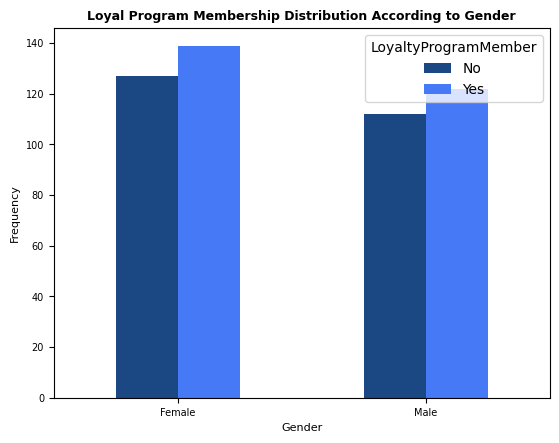

In [ ]:
plt.figure(figsize = (5,1))
df2.plot(kind= "bar",color = ["#1b4782","#4679f6"])
plt.title("Loyal Program Membership Distribution According to Gender",fontsize = 9, fontweight = 600)
plt.xlabel("Gender",fontsize = 8)
plt.ylabel("Frequency", fontsize = 8)
plt.xticks(rotation = 0, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

In [ ]:
#Grouping customers so as to see the age group distribution among the seperate genders
df2_1 = df.groupby(["Gender",'AgeGroup']).size().unstack()
df2_1

AgeGroup,Adults,Older Adults,Young Adults
Gender,,,
Female,103,79,84
Male,98,74,62


<Figure size 500x100 with 0 Axes>

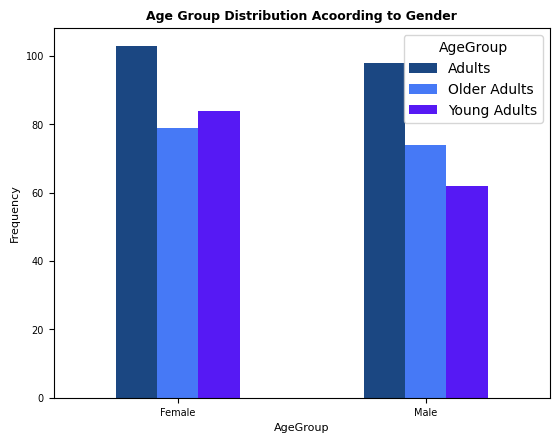

In [ ]:
# Visualizing The Gender Distribution Acoording to age groups.
plt.figure(figsize = (5,1))
df2_1.plot(kind= "bar",color = ["#1b4782","#4679f6","#5619f4"])
plt.title("Age Group Distribution Acoording to Gender",fontsize = 9, fontweight = 600)
plt.xlabel("AgeGroup",fontsize = 8)
plt.ylabel("Frequency", fontsize = 8)
plt.xticks(rotation = 0, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

#### Grouping by Age Groups

In [ ]:
df.groupby("AgeGroup")[['PurchaseAmount','PurchaseFrequency','DiscountUsage']].describe().T

AgeGroup                      Adults  Older Adults  Young Adults
PurchaseAmount    count   201.000000    153.000000    146.000000
                  mean   1092.443760   1058.955391   1033.725991
                  std     562.855602    603.074149    591.768713
                  min      51.799790     81.996526     79.547592
                  25%     597.192982    511.086642    520.294258
                  50%    1122.675236   1034.540245   1076.931935
                  75%    1572.353267   1609.103776   1611.863576
                  max    1995.569712   1999.655968   1990.529386
PurchaseFrequency count   201.000000    153.000000    146.000000
                  mean     13.850746     15.209150     13.993151
                  std       8.286592      8.381255      7.684733
                  min       1.000000      1.000000      1.000000
                  25%       7.000000      8.000000      7.250000
                  50%      14.000000     14.000000     13.000000
                  75%      21.000000     23.000000     21.000000
                  max      29.000000     29.000000     29.000000
DiscountUsage     count   201.000000    153.000000    146.000000
                  mean    264.275341    241.292488    243.516512
                  std     147.222702    134.846073    139.921867
                  min       0.772696      0.944364      8.201257
                  25%     147.988353    125.072737    119.392174
                  50%     264.023259    239.628735    249.548355
                  75%     393.034780    352.906854    371.893287
                  max     499.658742    499.813315    490.426624

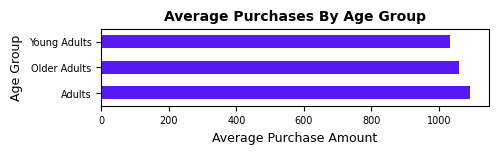

In [ ]:
purchase_by_age_group = df.groupby("AgeGroup")["PurchaseAmount"].mean()

#Plotting the distribution
plt.figure(figsize = (5,1))
purchase_by_age_group.plot(kind="barh", color = "#5619f4")
plt.title("Average Purchases By Age Group",fontsize = 10, fontweight = 600)
plt.ylabel("Age Group",fontsize = 9)
plt.xlabel("Average Purchase Amount", fontsize = 9)
plt.xticks(rotation = 0, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()


In [ ]:
df.groupby("AgeGroup")[['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating',
       'WebsiteEaseOfUseRating', 'ReturnRate']].describe().T

AgeGroup                          Adults  Older Adults  Young Adults
ProductQualityRating   count  201.000000    153.000000    146.000000
                       mean     3.000000      2.803922      2.979452
                       std      1.410674      1.428372      1.391943
                       min      1.000000      1.000000      1.000000
                       25%      2.000000      2.000000      2.000000
                       50%      3.000000      3.000000      3.000000
                       75%      4.000000      4.000000      4.000000
                       max      5.000000      5.000000      5.000000
DeliveryTimeRating     count  201.000000    153.000000    146.000000
                       mean     2.925373      3.091503      3.034247
                       std      1.345141      1.425148      1.356539
                       min      1.000000      1.000000      1.000000
                       25%      2.000000      2.000000      2.000000
                       50%      3.000000      3.000000      3.000000
                       75%      4.000000      4.000000      4.000000
                       max      5.000000      5.000000      5.000000
CustomerServiceRating  count  201.000000    153.000000    146.000000
                       mean     3.104478      3.013072      3.109589
                       std      1.450527      1.307805      1.481487
                       min      1.000000      1.000000      1.000000
                       25%      2.000000      2.000000      2.000000
                       50%      3.000000      3.000000      3.000000
                       75%      4.000000      4.000000      4.000000
                       max      5.000000      5.000000      5.000000
WebsiteEaseOfUseRating count  201.000000    153.000000    146.000000
                       mean     3.124378      3.104575      3.000000
                       std      1.356264      1.465226      1.447947
                       min      1.000000      1.000000      1.000000
                       25%      2.000000      2.000000      2.000000
                       50%      3.000000      3.000000      3.000000
                       75%      4.000000      5.000000      4.000000
                       max      5.000000      5.000000      5.000000
ReturnRate             count  201.000000    153.000000    146.000000
                       mean     0.250149      0.261961      0.245068
                       std      0.151243      0.151554      0.145977
                       min      0.000000      0.000000      0.000000
                       25%      0.110000      0.120000      0.120000
                       50%      0.260000      0.270000      0.255000
                       75%      0.380000      0.400000      0.360000
                       max      0.500000      0.500000      0.500000

In [ ]:
df.groupby('AgeGroup')[['LoyaltyProgramMember', 'Gender']].describe().T

AgeGroup                     Adults Older Adults Young Adults
LoyaltyProgramMember count      201          153          146
                     unique       2            2            2
                     top        Yes           No          Yes
                     freq       109           79           78
Gender               count      201          153          146
                     unique       2            2            2
                     top     Female       Female       Female
                     freq       103           79           84

In [ ]:
# Grouping the Customers First By AgeGroup then By their Memberships
df3 = df.groupby(["AgeGroup","LoyaltyProgramMember"]).size().unstack()
df3

LoyaltyProgramMember,No,Yes
AgeGroup,,
Adults,92,109
Older Adults,79,74
Young Adults,68,78


<Figure size 500x100 with 0 Axes>

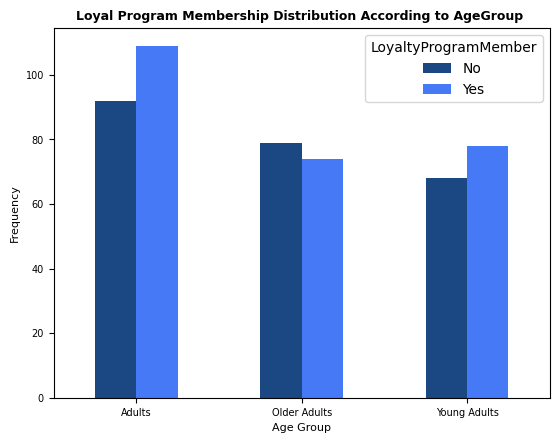

In [ ]:
# Visualizing The members of the Loyal Program Members
plt.figure(figsize = (5,1))
df3.plot(kind= "bar",color = ["#1b4782","#4679f6"])
plt.title("Loyal Program Membership Distribution According to AgeGroup ",fontsize = 9, fontweight = 600)
plt.xlabel("Age Group",fontsize = 8)
plt.ylabel("Frequency", fontsize = 8)
plt.xticks(rotation = 0, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

#### **Correlation between  all the Columns**

In [ ]:
df.columns

Index(['Age', 'Gender', 'PurchaseAmount', 'PurchaseFrequency',
       'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating',
       'WebsiteEaseOfUseRating', 'ReturnRate', 'DiscountUsage',
       'LoyaltyProgramMember', 'AgeGroup'],
      dtype='object')

In [ ]:
#Creating a new dataframe from the old one but excluding the agegroup column, since it's numerical variant exists as the age column.
df_corr = df.drop(columns =['AgeGroup'] )

In [ ]:
#Encoding the two categorical columns to enable me get a correlation.
df_corr['Gender'] = df_corr['Gender'].replace({"Male":0,"Female":1})
df_corr['LoyaltyProgramMember'] = df_corr['LoyaltyProgramMember'].replace({"Yes":1,"No":0})

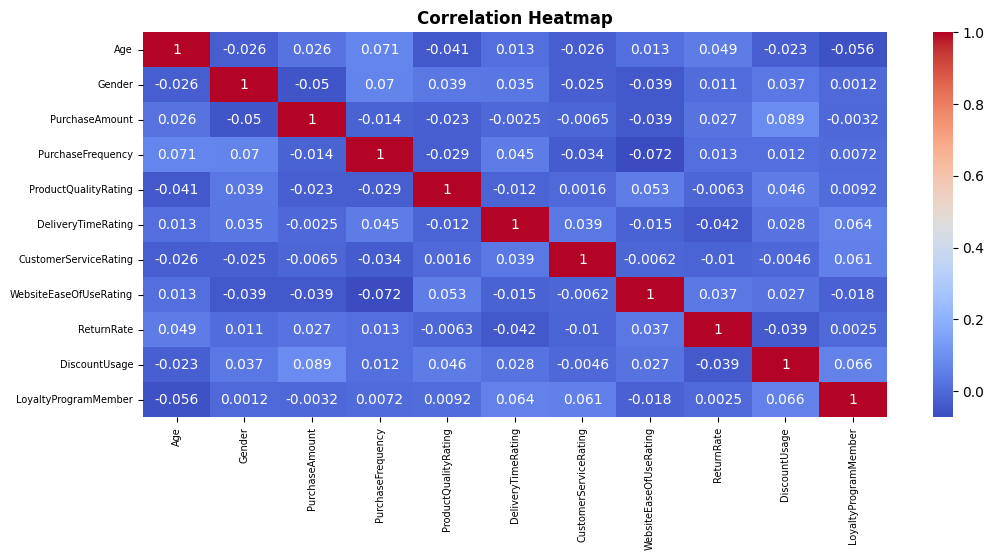

In [ ]:
# Visualizing the Correlation Using a HeatMap.
plt.figure(figsize=(12, 5))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontweight = 600)
plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

## **Summary**

**Customer Satisfaction Analysis**

This project analyses the Customer Satisfaction Analysis dataset to uncover patterns, relationships and actionable insights about customer behaviour and satisfaction.

**Objectives**

The goal of this project is to answer the following questions based on the given dataset :

1. What are the key drivers of customer satisfaction or dissatisfaction.
2. What suprised you about the data
3. What next steps would you recommend for the business

**About Columns**
1. `ReturnRate`: The ratio of goods returned by customers in relation to their total purchase.(Inverse relationship with satisfaction)
2. `LoyaltyProgram` : This is a pogram that encourages customer patronage via freebies, vouhers, discounts and other means.
3. The other columns are well explanatory.
4. The dataset is sorted on the `CustomerID` column, so the order of placement does not have any meaning.
------

**Demographic Findings**

1. **How many are the Customers ?** 500
2. **Whats is the distribution of males and Females ?** We had `53.2% Female` and `46.8% Male` customers. A fair distribution if you ask me.
3. **Whats is the Age distribution like ?** Most of our customers were Adults from `ages 35-54`. The other half our customers were a equal mix of `young adults 18-34` and `Older Adults 55-69`. It seems like the store has a 18+ policy.
4. **What's the general overview of the ratings ?** From my analysis, Customers gave us an `average rating of 3` across all boards. Which is a Good rating.
5. **What's the Sum Total purchase ?** The Store grossed a `Total Purchase of 532,525.37.`
6. **How much of our customers joined the loyal members program ?** `A little above 50%` of our customers did join the program.

---------
**Key Findings**

1. **What are the key drivers of customer satisfaction or dissatisfaction.** : `DiscountUsage`,`DeliveryTime`.
2. **What suprised you about the data** : I don't really know but i guess the low/random correlation between columns.
3. **What next steps would you recommend for the business** : from my experience with the dataset.
   - I'll Advise an improvement on delivery time
   - I'll encourage more discount offers.
   - I'll advise more members be added to the Loyalty Program Scheme.
   - I'll advise an improvement on the Website experience.
   - The company should investigate the condition of the products that were returned and why they were returned
   - An improvement in the quality of products sold.

**Delivery Time**
- Customers are more happy with fast deliveries hence the positive correlation with the `CustomerServiceRating` (+0.039).
- The poorer the delivery rating the higher the return rate (-0.042 correlation) This might idicate that the condition of the purchase looked better on the web than in real life or they were no longer interested due to the time wasting.


**Discount Offers**
- The Discounts encourage Higher Purchases.Hence a High Positive correlation of 0.089
- The higher the discount usage the lower the return rate.This was indicated by the negative correlation of -0.039 between the `DiscountUsage` and `ReturnRate` columns.

  
**Loyalty Programs**

The dataset indicates that the members of the Loyalty Program often times use the Discounts. This was indicated by the positive correlation of (0.66).Hence we can say, This column is well associated with the `DiscountUsage` column.


**Ease Of Using Website**
This had little effect on customers satisfaction but i feel if the ui/ux is improved it might have a good effect on the customers satisfaction.

**Note** - I ensured taking volume into considweration when drawing conclusions from my heatmap . For Example Females are More than males so i should be careful drawing conclusions from the gender part.